In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from pydbm.semisupervised.reconstruction_classification_networks import ReconstructionClassificationNetworks
from pydbm.semisupervised.autoencodable.convolutional_dec import ConvolutionalDEC
from pydbm.semisupervised.reconstruction_classification_networks import ReconstructionClassificationNetworks
from pydbm.cnn.convolutionalneuralnetwork.convolutional_auto_encoder import ConvolutionalAutoEncoder
from pydbm.cnn.convolutionalneuralnetwork.convolutionalautoencoder.convolutional_ladder_networks import ConvolutionalLadderNetworks
from pydbm.cnn.layerablecnn.convolution_layer import ConvolutionLayer as ConvolutionLayer1
from pydbm.cnn.layerablecnn.convolution_layer import ConvolutionLayer as ConvolutionLayer2
from pydbm.cnn.layerablecnn.max_pooling_layer import MaxPoolingLayer
from pydbm.cnn.featuregenerator.image_generator import ImageGenerator
from pydbm.synapse.cnn_graph import CNNGraph as ConvGraph1
from pydbm.synapse.cnn_graph import CNNGraph as ConvGraph2
from pydbm.synapse.cnn_graph import CNNGraph as ConvGraph3
from pydbm.activation.relu_function import ReLuFunction
from pydbm.activation.tanh_function import TanhFunction
from pydbm.activation.identity_function import IdentityFunction
from pydbm.activation.logistic_function import LogisticFunction
from pydbm.loss.mean_squared_error import MeanSquaredError
from pydbm.loss.kl_divergence import KLDivergence
from pydbm.optimization.optparams.adam import Adam
from pydbm.optimization.optparams.nadam import Nadam
from pydbm.activation.softmax_function import SoftmaxFunction
from pydbm.synapse.nn_graph import NNGraph as EncoderGraph
from pydbm.synapse.nn_graph import NNGraph as DecoderGraph
from pydbm.verification.verificate_function_approximation import VerificateFunctionApproximation
from pydbm.optimization.batch_norm import BatchNorm
from pydbm.optimization.optparams.rms_prop import RMSProp
from pydbm.optimization.batch_norm import BatchNorm

In [3]:
from logging import getLogger, StreamHandler, NullHandler, DEBUG, ERROR

logger = getLogger("pydbm")
handler = StreamHandler()
handler.setLevel(DEBUG)
logger.setLevel(DEBUG)
logger.addHandler(handler)

In [4]:
from pydbm.cnn.featuregenerator.label_image_generator import LabelImageGenerator

channel = 1
epochs = 100

height = 28
width = 28
scale = 0.01
feature_generator = LabelImageGenerator(
    epochs=1000,
    batch_size=500,
    training_image_dir="../../../../../Downloads/trainingSample/trainingSample///",
    test_image_dir="../../../../../Downloads/trainingSample/trainingSample///",
    seq_len=None,
    gray_scale_flag=True,
    wh_size_tuple=(width, height),
    norm_mode="z_score"
)

In [5]:
batch_size = 20
dim1 = channel * width * height
dim2 = 100
scale = 1e-05

In [7]:
for data, _data, _, _ in feature_generator.generate():
    observed_arr = data
    label_arr = _data
    break

label_arr = label_arr.astype(np.float)

In [9]:
observed_arr.shape, label_arr.shape

((500, 1, 28, 28), (500, 10))

In [16]:
from pydbm.optimization.batch_norm import BatchNorm

activation_function=IdentityFunction()

conv1 = ConvolutionLayer1(
    ConvGraph1(
        activation_function=activation_function,
        filter_num=batch_size,
        channel=channel,
        kernel_size=3,
        scale=scale,
        stride=1,
        pad=1
    )
)

activation_function=TanhFunction()

conv3 = ConvolutionLayer2(
    ConvGraph3(
        activation_function=activation_function,
        filter_num=batch_size,
        channel=batch_size,
        kernel_size=3,
        scale=scale,
        stride=1,
        pad=1
    )
)


opt_params = Nadam()

ncnn = ConvolutionalLadderNetworks(
    layerable_cnn_list=[
        conv1, 
        #conv2,
        conv3,
        #conv4
    ],
    epochs=100,
    batch_size=batch_size,
    learning_rate=0.01,
    learning_attenuate_rate=0.1,
    attenuate_epoch=25,
    computable_loss=MeanSquaredError(),
    opt_params=opt_params,
    verificatable_result=VerificateFunctionApproximation(),
    test_size_rate=0.3,
    tol=0.0,
    save_flag=False,
    output_no_bias_flag=True
)

Setup CNN layers and the parameters.
Setup Convolutional Auto-Encoder and the parameters.


In [18]:
cnn_dec = ConvolutionalDEC()
cnn_dec.auto_encoder_model = ncnn

opt_params_dec = Nadam()
opt_params_dec.weight_limit = 1e+15
opt_params_dec.dropout_rate = 0.5


RCN = ReconstructionClassificationNetworks(
    cnn_dec,
    epochs=1000, 
    batch_size=batch_size, 
    learning_rate=0.01, 
    learning_attenuate_rate=0.1,
    attenuate_epoch=100,
    tld=0.0, 
    tol=0.0,
)

In [19]:
RCN.learn(observed_arr=observed_arr, target_arr=label_arr)

Setup NN layers and the parameters.
Epoch: 0 Train loss: 2.213772891529376 Test loss: 98.98582310466722
Train classification loss: 2.9957322615634943 Test classification loss: 137.47528203680002
Train reconstruction loss: 0.3892010281164342 Test reconstruction loss: 9.177085596357388
Epoch: 1 Train loss: 45.26682210117823 Test loss: 159.5319277050104
Train classification loss: 53.5955577771701 Test classification loss: 213.77706095910884
Train reconstruction loss: 25.833105523863857 Test reconstruction loss: 32.95995011211403
Epoch: 2 Train loss: 80.57226833134776 Test loss: 119.26619002819578
Train classification loss: 102.07154399892025 Test classification loss: 155.1983400696878
Train reconstruction loss: 30.40729177367865 Test reconstruction loss: 35.424506598047756
Epoch: 3 Train loss: 53.60724231747095 Test loss: 140.9318800857176
Train classification loss: 64.88893163024805 Test classification loss: 186.58572165657475
Train reconstruction loss: 27.283300587657717 Test reconstruc

Epoch: 33 Train loss: 21.18227017676296 Test loss: 37.275190099168164
Train classification loss: 19.046895039743447 Test classification loss: 41.4062270242775
Train reconstruction loss: 26.16481216314182 Test reconstruction loss: 27.63610394057972
Epoch: 34 Train loss: 11.050402962870741 Test loss: 39.32528950229555
Train classification loss: 3.6471350875459323 Test classification loss: 44.51064975069342
Train reconstruction loss: 28.324694671961957 Test reconstruction loss: 27.226115589367193
Epoch: 35 Train loss: 15.010096547323018 Test loss: 25.06247293474982
Train classification loss: 8.541452512901953 Test classification loss: 23.63172280468281
Train reconstruction loss: 30.103599294305496 Test reconstruction loss: 28.400889904906187
Epoch: 36 Train loss: 10.755449847515255 Test loss: 27.105318987962285
Train classification loss: 1.6274572349329515 Test classification loss: 25.876510669797103
Train reconstruction loss: 32.05409927687396 Test reconstruction loss: 29.972538397014386

Epoch: 66 Train loss: 6.628247916936375 Test loss: 47.64700773911446
Train classification loss: 0.0009041749385638323 Test classification loss: 55.96175215238641
Train reconstruction loss: 22.09204998159793 Test reconstruction loss: 28.245937441479906
Epoch: 67 Train loss: 20.452106661510026 Test loss: 25.119372073901502
Train classification loss: 18.063954587144636 Test classification loss: 24.393120974038702
Train reconstruction loss: 26.02446150169593 Test reconstruction loss: 26.81395797358137
Epoch: 68 Train loss: 13.125095284091348 Test loss: 52.225265306043624
Train classification loss: 8.286173858151779 Test classification loss: 63.89176716752805
Train reconstruction loss: 24.41591194461701 Test reconstruction loss: 25.00342762924663
Epoch: 69 Train loss: 10.810595225790472 Test loss: 29.712265749604086
Train classification loss: 5.6340374745973065 Test classification loss: 31.565411091771516
Train reconstruction loss: 22.889229978574523 Test reconstruction loss: 25.38825995121

Epoch: 99 Train loss: 5.869223516817172 Test loss: 16.968822238081792
Train classification loss: 0.0 Test classification loss: 16.02943475264464
Train reconstruction loss: 19.56407838939057 Test reconstruction loss: 19.160726370768472
Epoch: 100 Train loss: 5.23995570595858 Test loss: 25.705760098295283
Train classification loss: 5.551115123125783e-18 Test classification loss: 28.906214483837385
Train reconstruction loss: 17.46651901986193 Test reconstruction loss: 18.23803319869705
Epoch: 101 Train loss: 7.57143977416621 Test loss: 24.588330332402478
Train classification loss: 3.601095122087142 Test classification loss: 27.581432079628485
Train reconstruction loss: 16.835577295684036 Test reconstruction loss: 17.604426255541796
Epoch: 102 Train loss: 5.442592932528483 Test loss: 14.839575803141075
Train classification loss: 0.0 Test classification loss: 11.831569939468087
Train reconstruction loss: 18.141976441761607 Test reconstruction loss: 21.85825615171138
Epoch: 103 Train loss: 6

Epoch: 132 Train loss: 4.8486985090780905 Test loss: 11.913082247335124
Train classification loss: 0.001962103198011905 Test classification loss: 9.342261007917612
Train reconstruction loss: 16.157750122798273 Test reconstruction loss: 17.911665139309317
Epoch: 133 Train loss: 4.563047869630527 Test loss: 20.827344452065578
Train classification loss: 6.0479470912507924e-05 Test classification loss: 21.341107925797818
Train reconstruction loss: 15.210018446669626 Test reconstruction loss: 19.628563013357017
Epoch: 134 Train loss: 5.907610654893861 Test loss: 13.039305437205384
Train classification loss: 1.5415446696922674e-14 Test classification loss: 10.73775915397382
Train reconstruction loss: 19.69203551631283 Test reconstruction loss: 18.40958009807903
Epoch: 135 Train loss: 5.5771876902296915 Test loss: 21.00680996835942
Train classification loss: 8.233737587411282e-11 Test classification loss: 21.71824536992255
Train reconstruction loss: 18.590625633906846 Test reconstruction loss

Train reconstruction loss: 17.30286349807813 Test reconstruction loss: 19.446961342391763
Epoch: 165 Train loss: 4.544694437634685 Test loss: 23.62801530480035
Train classification loss: 0.0 Test classification loss: 25.982870934358203
Train reconstruction loss: 15.148981458782279 Test reconstruction loss: 18.133352169165363
Epoch: 166 Train loss: 4.698838745114637 Test loss: 28.944370008868322
Train classification loss: 0.0001436197396833796 Test classification loss: 34.26510331635152
Train reconstruction loss: 15.66246070432286 Test reconstruction loss: 16.52932562474086
Epoch: 167 Train loss: 4.639778966649601 Test loss: 4.7575933568842235
Train classification loss: 0.02152997785365465 Test classification loss: 0.8868334819743756
Train reconstruction loss: 15.415693273840143 Test reconstruction loss: 13.789366398340531
Epoch: 168 Train loss: 4.776407622849323 Test loss: 30.611778900682857
Train classification loss: 0.00011807625223123075 Test classification loss: 37.41733452014896
T

Train classification loss: 1.889352008502353e-11 Test classification loss: 12.208921551196685
Train reconstruction loss: 12.719013724827471 Test reconstruction loss: 14.952863275966143
Epoch: 198 Train loss: 3.657138243882897 Test loss: 11.491147804410296
Train classification loss: 5.2835513741931487e-14 Test classification loss: 10.370733101843257
Train reconstruction loss: 12.190460812942867 Test reconstruction loss: 14.10544877706672
Epoch: 199 Train loss: 3.907366109473335 Test loss: 16.265270065540925
Train classification loss: 0.0 Test classification loss: 16.294785892829005
Train reconstruction loss: 13.024553698244448 Test reconstruction loss: 16.196399801868743
Epoch: 200 Train loss: 3.998789852928692 Test loss: 14.566429866298774
Train classification loss: 4.831360496918173e-05 Test classification loss: 15.194384565999187
Train reconstruction loss: 13.329186778017377 Test reconstruction loss: 13.101202233664484
Epoch: 201 Train loss: 3.7958986250462834 Test loss: 10.583978759

Epoch: 230 Train loss: 3.9571442148636686 Test loss: 17.530806622259583
Train classification loss: 0.0 Test classification loss: 19.24091299509462
Train reconstruction loss: 13.190480716212226 Test reconstruction loss: 13.540558418977824
Epoch: 231 Train loss: 4.274450972040101 Test loss: 23.184633636617114
Train classification loss: 0.0015530015649532461 Test classification loss: 26.917367095064368
Train reconstruction loss: 14.244546236482108 Test reconstruction loss: 14.474922233573537
Epoch: 232 Train loss: 3.9829391633744535 Test loss: 26.819797628328907
Train classification loss: 0.03952742422206902 Test classification loss: 31.997873010391185
Train reconstruction loss: 13.184233221396681 Test reconstruction loss: 14.737621736850247
Epoch: 233 Train loss: 3.688895338299149 Test loss: 5.001250183811716
Train classification loss: 7.33374472266895e-13 Test classification loss: 1.094707468596699
Train reconstruction loss: 12.296317794328784 Test reconstruction loss: 14.11651651931342

Train reconstruction loss: 12.795603945033138 Test reconstruction loss: 13.284958317455123
Epoch: 263 Train loss: 3.4379498328960927 Test loss: 13.353558923852376
Train classification loss: 5.151434834263357e-14 Test classification loss: 13.138892055705544
Train reconstruction loss: 11.459832776320187 Test reconstruction loss: 13.854448282861654
Epoch: 264 Train loss: 4.124511557086963 Test loss: 21.499257543886216
Train classification loss: 0.0 Test classification loss: 24.924758000878516
Train reconstruction loss: 13.748371856956544 Test reconstruction loss: 13.506423144237507
Epoch: 265 Train loss: 3.383695172229647 Test loss: 32.309832350361155
Train classification loss: 0.0 Test classification loss: 40.37040319738039
Train reconstruction loss: 11.278983907432155 Test reconstruction loss: 13.501833707316285
Epoch: 266 Train loss: 4.341044321455406 Test loss: 25.536719803661793
Train classification loss: 0.010837852769496588 Test classification loss: 30.77016707534388
Train reconstr

Train classification loss: 0.0 Test classification loss: 15.665200341963399
Train reconstruction loss: 13.78685789909715 Test reconstruction loss: 14.227784918199294
Epoch: 296 Train loss: 4.1113450521139585 Test loss: 15.414331100099695
Train classification loss: 0.2960072807571976 Test classification loss: 15.653558402310063
Train reconstruction loss: 13.013799851946398 Test reconstruction loss: 14.856134061608834
Epoch: 297 Train loss: 4.320532293615205 Test loss: 4.612722976624859
Train classification loss: 0.08294150441708156 Test classification loss: 1.7257841175560842
Train reconstruction loss: 14.208244135077491 Test reconstruction loss: 11.348913647785334
Epoch: 298 Train loss: 3.728201341253817 Test loss: 25.888465012178933
Train classification loss: 0.2260461115229207 Test classification loss: 30.849592532074304
Train reconstruction loss: 11.899896877292575 Test reconstruction loss: 14.312500799089733
Epoch: 299 Train loss: 3.9619105371518915 Test loss: 17.600486090854
Train

Epoch: 328 Train loss: 3.7928223522961466 Test loss: 14.919622339800732
Train classification loss: 2.0987987494948738e-10 Test classification loss: 15.498085882269965
Train reconstruction loss: 12.642741173830768 Test reconstruction loss: 13.569874074039184
Epoch: 329 Train loss: 3.5741864067059494 Test loss: 11.318483505449262
Train classification loss: 0.0 Test classification loss: 10.064253373513832
Train reconstruction loss: 11.91395468901983 Test reconstruction loss: 14.245020479965264
Epoch: 330 Train loss: 3.6072446324949716 Test loss: 27.1515219990804
Train classification loss: 2.5621256755857633e-08 Test classification loss: 32.03002531061592
Train reconstruction loss: 12.024148715200305 Test reconstruction loss: 15.768347605497526
Epoch: 331 Train loss: 3.7258162578140754 Test loss: 10.415890225306516
Train classification loss: 1.4723294807671868e-11 Test classification loss: 9.39614499929289
Train reconstruction loss: 12.419387526012562 Test reconstruction loss: 12.795295752

Train reconstruction loss: 12.485470649525197 Test reconstruction loss: 13.093547118549079
Epoch: 361 Train loss: 3.8415300727120036 Test loss: 18.27286443043822
Train classification loss: 5.889733145636802e-15 Test classification loss: 20.70641938569675
Train reconstruction loss: 12.80510024237333 Test reconstruction loss: 12.59456953483497
Epoch: 362 Train loss: 3.857025188140984 Test loss: 23.243512834299995
Train classification loss: 0.0 Test classification loss: 27.58834452223145
Train reconstruction loss: 12.856750627136611 Test reconstruction loss: 13.105572229126608
Epoch: 363 Train loss: 3.5636425545688093 Test loss: 28.7589596236408
Train classification loss: 5.64180369120955e-12 Test classification loss: 35.569799550724504
Train reconstruction loss: 11.878808515216198 Test reconstruction loss: 12.86699979377882
Epoch: 364 Train loss: 3.7250442202506737 Test loss: 12.46784713287559
Train classification loss: 0.010050503654403626 Test classification loss: 12.547964419572182
Tr

Train classification loss: 0.000333694171823772 Test classification loss: 20.7193223101307
Train reconstruction loss: 13.403999544416658 Test reconstruction loss: 13.988330461023015
Epoch: 394 Train loss: 3.749302952862525 Test loss: 7.8773339643372875
Train classification loss: 0.002603515148690813 Test classification loss: 4.553119376295568
Train reconstruction loss: 12.49160164086147 Test reconstruction loss: 15.633834669767964
Epoch: 395 Train loss: 3.6415273343811876 Test loss: 11.503746143110902
Train classification loss: 0.0054461777432333065 Test classification loss: 9.910509424104221
Train reconstruction loss: 12.125716699869745 Test reconstruction loss: 15.221298487459821
Epoch: 396 Train loss: 3.78793820493556 Test loss: 15.799324968046339
Train classification loss: 0.04502720594427754 Test classification loss: 16.460578996622786
Train reconstruction loss: 12.521397202581884 Test reconstruction loss: 14.25639890136796
Epoch: 397 Train loss: 4.040978008349451 Test loss: 28.66

Epoch: 426 Train loss: 4.288459677236936 Test loss: 8.265481872179471
Train classification loss: 0.1535670383631333 Test classification loss: 4.985999102975501
Train reconstruction loss: 13.936542501275808 Test reconstruction loss: 15.917608333655398
Epoch: 427 Train loss: 3.711672122949334 Test loss: 11.77188692400571
Train classification loss: 0.0002916190529796809 Test classification loss: 10.76407028254211
Train reconstruction loss: 12.371559965374159 Test reconstruction loss: 14.123459087420775
Epoch: 428 Train loss: 3.429092539237469 Test loss: 10.947866181459963
Train classification loss: 0.062242915914583176 Test classification loss: 9.747960780955292
Train reconstruction loss: 11.285074993657535 Test reconstruction loss: 13.747645449304192
Epoch: 429 Train loss: 3.9853355702318716 Test loss: 10.899360797516747
Train classification loss: 0.1410190283152129 Test classification loss: 9.422790701899675
Train reconstruction loss: 12.95540750137074 Test reconstruction loss: 14.34469

Train reconstruction loss: 12.888047074285495 Test reconstruction loss: 13.35434066479793
Epoch: 459 Train loss: 3.843659747555792 Test loss: 7.25718484489398
Train classification loss: 1.665334536937735e-17 Test classification loss: 5.138186918491174
Train reconstruction loss: 12.812199158519306 Test reconstruction loss: 12.20151333983386
Epoch: 460 Train loss: 3.3869403910803673 Test loss: 12.629890927201
Train classification loss: 7.10542735760105e-16 Test classification loss: 11.853306585892017
Train reconstruction loss: 11.289801303601221 Test reconstruction loss: 14.441921056921958
Epoch: 461 Train loss: 3.9542925817175134 Test loss: 7.725280611453057
Train classification loss: 0.008315340823759718 Test classification loss: 5.80276165566748
Train reconstruction loss: 13.161572810469604 Test reconstruction loss: 12.211158174952734
Epoch: 462 Train loss: 3.4933499866233624 Test loss: 9.8788858793268
Train classification loss: 0.13225016460524291 Test classification loss: 8.68764263

Train classification loss: 9.104317300884355e-12 Test classification loss: 13.287310320337891
Train reconstruction loss: 11.995262334208038 Test reconstruction loss: 13.040031171410407
Epoch: 492 Train loss: 3.6418771268826635 Test loss: 16.826068144132933
Train classification loss: 6.323352137757933e-05 Test classification loss: 17.951231472298726
Train reconstruction loss: 12.139442878058995 Test reconstruction loss: 14.200687045079412
Epoch: 493 Train loss: 3.234572419280369 Test loss: 15.557334502460945
Train classification loss: 3.732334031251328e-09 Test classification loss: 16.665451713024453
Train reconstruction loss: 10.781908055559116 Test reconstruction loss: 12.971727677812758
Epoch: 494 Train loss: 3.5022525698404086 Test loss: 27.662060889064964
Train classification loss: 0.0 Test classification loss: 33.77013188810394
Train reconstruction loss: 11.67417523280136 Test reconstruction loss: 13.409895224640696
Epoch: 495 Train loss: 3.4512791918266563 Test loss: 13.731667719

Epoch: 524 Train loss: 3.9365812133989553 Test loss: 10.20956296704506
Train classification loss: 2.2204460492503135e-17 Test classification loss: 9.922997334157309
Train reconstruction loss: 13.121937377996515 Test reconstruction loss: 10.878216110449808
Epoch: 525 Train loss: 3.258890457401293 Test loss: 31.762348138724036
Train classification loss: 0.000312619438833123 Test classification loss: 39.749321771079664
Train reconstruction loss: 10.862238745980365 Test reconstruction loss: 13.12607632989423
Epoch: 526 Train loss: 3.807959452580934 Test loss: 10.816243796698654
Train classification loss: 0.014717620282531443 Test classification loss: 9.183713095400408
Train reconstruction loss: 12.658857061277205 Test reconstruction loss: 14.625482099727893
Epoch: 527 Train loss: 3.747042276560759 Test loss: 13.669808168347638
Train classification loss: 1.2168044349892632e-14 Test classification loss: 14.77396661630885
Train reconstruction loss: 12.490140921869168 Test reconstruction loss:

Epoch: 557 Train loss: 4.296102459747105 Test loss: 10.030638921088183
Train classification loss: 5.856007004590902e-06 Test classification loss: 8.332480774528726
Train reconstruction loss: 14.320327868474001 Test reconstruction loss: 13.99300792972692
Epoch: 558 Train loss: 3.9612037794247676 Test loss: 24.13016008565815
Train classification loss: 0.0 Test classification loss: 29.07529951785395
Train reconstruction loss: 13.204012598082556 Test reconstruction loss: 12.591501410534622
Epoch: 559 Train loss: 3.8625603478429067 Test loss: 7.5073568177960714
Train classification loss: 0.0003143199164378181 Test classification loss: 4.659755144003548
Train reconstruction loss: 12.874467746337999 Test reconstruction loss: 14.151760723311956
Epoch: 560 Train loss: 3.413140880084787 Test loss: 12.329201116531202
Train classification loss: 1.0398363556197955e-09 Test classification loss: 12.049551089928457
Train reconstruction loss: 11.377136264523005 Test reconstruction loss: 12.981717845270

Train reconstruction loss: 12.406474691582767 Test reconstruction loss: 13.762102989206301
Epoch: 590 Train loss: 3.805311377867118 Test loss: 13.581622446763859
Train classification loss: 0.1302299202867378 Test classification loss: 13.365183730654024
Train reconstruction loss: 12.38050144555467 Test reconstruction loss: 14.086646117686804
Epoch: 591 Train loss: 3.5013627094236948 Test loss: 26.931707978122326
Train classification loss: 0.0 Test classification loss: 32.30046763225521
Train reconstruction loss: 11.671209031412314 Test reconstruction loss: 14.404602118478932
Epoch: 592 Train loss: 3.0099440648075135 Test loss: 22.049137734690497
Train classification loss: 0.005102213385722295 Test classification loss: 25.616788544381375
Train reconstruction loss: 10.021241718125026 Test reconstruction loss: 13.72461917874511
Epoch: 593 Train loss: 3.5432207543464376 Test loss: 7.068520137534522
Train classification loss: 0.007746511407215805 Test classification loss: 4.134138001628081
T

Train classification loss: 2.2204460492503135e-17 Test classification loss: 10.387378860373051
Train reconstruction loss: 15.37322355916779 Test reconstruction loss: 13.616955623003285
Epoch: 623 Train loss: 4.353900842561101 Test loss: 7.145007854564637
Train classification loss: 0.13005855329556762 Test classification loss: 5.083484843714815
Train reconstruction loss: 14.209532850847346 Test reconstruction loss: 11.955228213214223
Epoch: 624 Train loss: 3.880915890436283 Test loss: 27.059059577565364
Train classification loss: 0.0 Test classification loss: 33.33045176841638
Train reconstruction loss: 12.936386301454274 Test reconstruction loss: 12.425811132246332
Epoch: 625 Train loss: 4.016561779484994 Test loss: 14.234647652558873
Train classification loss: 0.014528184615794604 Test classification loss: 14.056993056727013
Train reconstruction loss: 13.354640167513125 Test reconstruction loss: 14.64917504283322
Epoch: 626 Train loss: 3.757400959823039 Test loss: 10.408820701245078
T

Epoch: 655 Train loss: 3.2075705037649387 Test loss: 12.126252557526053
Train classification loss: 0.0 Test classification loss: 11.618119989678974
Train reconstruction loss: 10.69190167921646 Test reconstruction loss: 13.311895215835904
Epoch: 656 Train loss: 3.347172859616273 Test loss: 4.648332229066655
Train classification loss: 5.6309978401949366e-08 Test classification loss: 1.4368538048181856
Train reconstruction loss: 11.157242733997625 Test reconstruction loss: 12.141781885646415
Epoch: 657 Train loss: 3.881733045692152 Test loss: 12.571563155909933
Train classification loss: 0.0 Test classification loss: 12.66412062044211
Train reconstruction loss: 12.93911015230717 Test reconstruction loss: 12.355595738668185
Epoch: 658 Train loss: 3.712337574428478 Test loss: 11.931462092236732
Train classification loss: 0.005093047648789949 Test classification loss: 11.119958697887647
Train reconstruction loss: 12.362574803581081 Test reconstruction loss: 13.824970012384593
Epoch: 659 Trai

Epoch: 688 Train loss: 3.324608145976313 Test loss: 25.16860424700902
Train classification loss: 0.005434639226814534 Test classification loss: 30.076249141143514
Train reconstruction loss: 11.069346328391807 Test reconstruction loss: 13.717432827361879
Epoch: 689 Train loss: 4.254100402013628 Test loss: 11.378369575480374
Train classification loss: 0.007718066925446833 Test classification loss: 10.178939934315332
Train reconstruction loss: 14.162325850552714 Test reconstruction loss: 14.177038738198805
Epoch: 690 Train loss: 3.555403268903856 Test loss: 13.775272566531992
Train classification loss: 8.733339056078017e-11 Test classification loss: 13.784436807188047
Train reconstruction loss: 11.85134422947574 Test reconstruction loss: 13.753889338334531
Epoch: 691 Train loss: 3.88049309867705 Test loss: 14.157320099450278
Train classification loss: 0.0 Test classification loss: 14.241864656991405
Train reconstruction loss: 12.934976995590166 Test reconstruction loss: 13.960049465187653

Train reconstruction loss: 13.066768955943802 Test reconstruction loss: 12.871866661668365
Epoch: 721 Train loss: 3.5869247447335386 Test loss: 15.119917149140264
Train classification loss: 0.02953366299474098 Test classification loss: 15.87978730358039
Train reconstruction loss: 11.8875039354574 Test reconstruction loss: 13.346886788779967
Epoch: 722 Train loss: 3.588474611230733 Test loss: 19.943154287974576
Train classification loss: 0.010174929892217214 Test classification loss: 22.31284949010518
Train reconstruction loss: 11.937840534353933 Test reconstruction loss: 14.413865483003164
Epoch: 723 Train loss: 3.9032959049191804 Test loss: 32.595034037982
Train classification loss: 3.0586644328424e-15 Test classification loss: 40.511994015601815
Train reconstruction loss: 13.010986349730592 Test reconstruction loss: 14.12212742353579
Epoch: 724 Train loss: 3.608087525536376 Test loss: 13.760084234350312
Train classification loss: 3.737260002361698e-09 Test classification loss: 14.480

Epoch: 753 Train loss: 3.735603329321036 Test loss: 7.50975182438626
Train classification loss: 0.002719327457152267 Test classification loss: 5.3585038767484985
Train reconstruction loss: 12.445666000336763 Test reconstruction loss: 12.529330368874371
Epoch: 754 Train loss: 3.630058076278268 Test loss: 8.010920755355906
Train classification loss: 0.0077128953274590946 Test classification loss: 5.656538865390081
Train reconstruction loss: 12.082196831830155 Test reconstruction loss: 13.5044784986095
Epoch: 755 Train loss: 4.045973327237952 Test loss: 19.742136693424786
Train classification loss: 1.0109690862246896e-13 Test classification loss: 22.195951070472727
Train reconstruction loss: 13.486577757459601 Test reconstruction loss: 14.01656981364626
Epoch: 756 Train loss: 4.248844797521488 Test loss: 21.76290473562764
Train classification loss: 0.005091970308751125 Test classification loss: 26.20343482026766
Train reconstruction loss: 14.150934727684538 Test reconstruction loss: 11.40

Train reconstruction loss: 10.963134431615012 Test reconstruction loss: 16.53508265854863
Epoch: 786 Train loss: 4.051026846042386 Test loss: 18.221537216977612
Train classification loss: 0.03361168481053707 Test classification loss: 20.309060014342265
Train reconstruction loss: 13.424995555583363 Test reconstruction loss: 13.350650689793422
Epoch: 787 Train loss: 3.7189084548619316 Test loss: 23.51911184913433
Train classification loss: 0.011876107000968125 Test classification loss: 28.155309551977275
Train reconstruction loss: 12.368650599870845 Test reconstruction loss: 12.701317209167469
Epoch: 788 Train loss: 4.062743012870938 Test loss: 7.347916216295937
Train classification loss: 0.005091534022152716 Test classification loss: 4.651697315565023
Train reconstruction loss: 13.530596463518103 Test reconstruction loss: 13.639093651334733
Epoch: 789 Train loss: 3.4929513293292627 Test loss: 28.154135340459202
Train classification loss: 2.987375347982828e-11 Test classification loss: 3

Epoch: 818 Train loss: 3.966528176675507 Test loss: 4.729923316842298
Train classification loss: 0.0 Test classification loss: 0.7663530798303096
Train reconstruction loss: 13.221760588918354 Test reconstruction loss: 13.978253869870267
Epoch: 819 Train loss: 3.409724179828207 Test loss: 13.10114690144945
Train classification loss: 0.0 Test classification loss: 12.555296445025892
Train reconstruction loss: 11.365747266094022 Test reconstruction loss: 14.374797966437754
Epoch: 820 Train loss: 3.6419590487353086 Test loss: 12.726621908688951
Train classification loss: 0.12992015034762475 Test classification loss: 11.526882932853491
Train reconstruction loss: 11.836716478306569 Test reconstruction loss: 15.526012852305023
Epoch: 821 Train loss: 4.185192115250587 Test loss: 10.48964481456392
Train classification loss: 0.0027193591091095423 Test classification loss: 9.233215989871969
Train reconstruction loss: 13.944295212914032 Test reconstruction loss: 13.42131207217847
Epoch: 822 Train l

Train reconstruction loss: 15.372786298630828 Test reconstruction loss: 11.376328291249315
Epoch: 851 Train loss: 3.93615745007406 Test loss: 9.287222767738058
Train classification loss: 7.476706203636615e-05 Test classification loss: 6.694484987998614
Train reconstruction loss: 13.120350377102113 Test reconstruction loss: 15.33694425379676
Epoch: 852 Train loss: 3.8259540850841307 Test loss: 14.481396391749314
Train classification loss: 1.665334536937735e-17 Test classification loss: 14.85634119380243
Train reconstruction loss: 12.753180283613768 Test reconstruction loss: 13.606525186958706
Epoch: 853 Train loss: 3.1634814185503974 Test loss: 25.52095442789171
Train classification loss: 0.00031597339499539294 Test classification loss: 30.39063940875307
Train reconstruction loss: 10.544200790579668 Test reconstruction loss: 14.1583561392152
Epoch: 854 Train loss: 4.050511538680519 Test loss: 5.048430751193154
Train classification loss: 0.00508518600967006 Test classification loss: 2.00

Epoch: 883 Train loss: 3.4847029215949163 Test loss: 19.36133716276624
Train classification loss: 8.680470790753969e-11 Test classification loss: 21.51960075801079
Train reconstruction loss: 11.615676405113842 Test reconstruction loss: 14.325388773862294
Epoch: 884 Train loss: 3.9222467091949786 Test loss: 20.28915434384231
Train classification loss: 6.318821780353473e-05 Test classification loss: 22.83137392778647
Train reconstruction loss: 13.074008258141719 Test reconstruction loss: 14.357308647972605
Epoch: 885 Train loss: 3.791078118622236 Test loss: 9.346597771200033
Train classification loss: 0.005085201964586454 Test classification loss: 7.365056705158265
Train reconstruction loss: 12.625061590823417 Test reconstruction loss: 13.970193591964158
Epoch: 886 Train loss: 3.411658847177947 Test loss: 20.01230521613906
Train classification loss: 1.1073669982053162e-09 Test classification loss: 22.578750465565026
Train reconstruction loss: 11.372196154675965 Test reconstruction loss: 

Train reconstruction loss: 10.298182735673418 Test reconstruction loss: 12.049841236076118
Epoch: 916 Train loss: 3.529408058104012 Test loss: 14.683460035764414
Train classification loss: 0.00271931215317591 Test classification loss: 14.95828838843613
Train reconstruction loss: 11.758348465322628 Test reconstruction loss: 14.042193879530409
Epoch: 917 Train loss: 4.1049022023624735 Test loss: 5.052684548386007
Train classification loss: 0.0 Test classification loss: 0.9733966550340286
Train reconstruction loss: 13.683007341208242 Test reconstruction loss: 14.57102296620729
Epoch: 918 Train loss: 3.706281382044426 Test loss: 14.715744114448208
Train classification loss: 0.010430177720845056 Test classification loss: 15.173783846234267
Train reconstruction loss: 12.32993419213278 Test reconstruction loss: 13.646984740280736
Epoch: 919 Train loss: 3.3689520065259586 Test loss: 8.01240379955015
Train classification loss: 0.007105587214904084 Test classification loss: 5.281895700684604
Tra

Train classification loss: 4.440892098500636e-16 Test classification loss: 31.040588020818973
Train reconstruction loss: 15.028947380775572 Test reconstruction loss: 14.049057901038312
Epoch: 949 Train loss: 3.552890943543851 Test loss: 21.225326247525004
Train classification loss: 0.0 Test classification loss: 24.81039131465501
Train reconstruction loss: 11.842969811812836 Test reconstruction loss: 12.860174424221656
Epoch: 950 Train loss: 3.1822719502246692 Test loss: 34.17121635132671
Train classification loss: 5.789501391375547e-06 Test classification loss: 43.557685520567965
Train reconstruction loss: 10.607559658578984 Test reconstruction loss: 12.269454956430467
Epoch: 951 Train loss: 4.000190249128793 Test loss: 18.040060639276454
Train classification loss: 0.004143464304489199 Test classification loss: 20.12092424172456
Train reconstruction loss: 13.324299413718833 Test reconstruction loss: 13.184712233564206
Epoch: 952 Train loss: 4.169291899145896 Test loss: 21.7435709192093

Epoch: 981 Train loss: 3.780249596405898 Test loss: 28.003990414290616
Train classification loss: 5.793234403570352e-06 Test classification loss: 33.87231918976297
Train reconstruction loss: 12.600818470472717 Test reconstruction loss: 14.3112232715218
Epoch: 982 Train loss: 3.463916594066135 Test loss: 29.82738114067008
Train classification loss: 0.02946685344728623 Test classification loss: 36.33135361675391
Train reconstruction loss: 11.477632655510114 Test reconstruction loss: 14.65144536314116
Epoch: 983 Train loss: 4.127182890686807 Test loss: 11.45919364909107
Train classification loss: 0.03367350445092476 Test classification loss: 10.259397474597861
Train reconstruction loss: 13.678704791903863 Test reconstruction loss: 14.25871805624189
Epoch: 984 Train loss: 4.055295800642957 Test loss: 10.01767114244405
Train classification loss: 0.12991898752603914 Test classification loss: 8.242539666892307
Train reconstruction loss: 13.214508364582432 Test reconstruction loss: 14.15964458

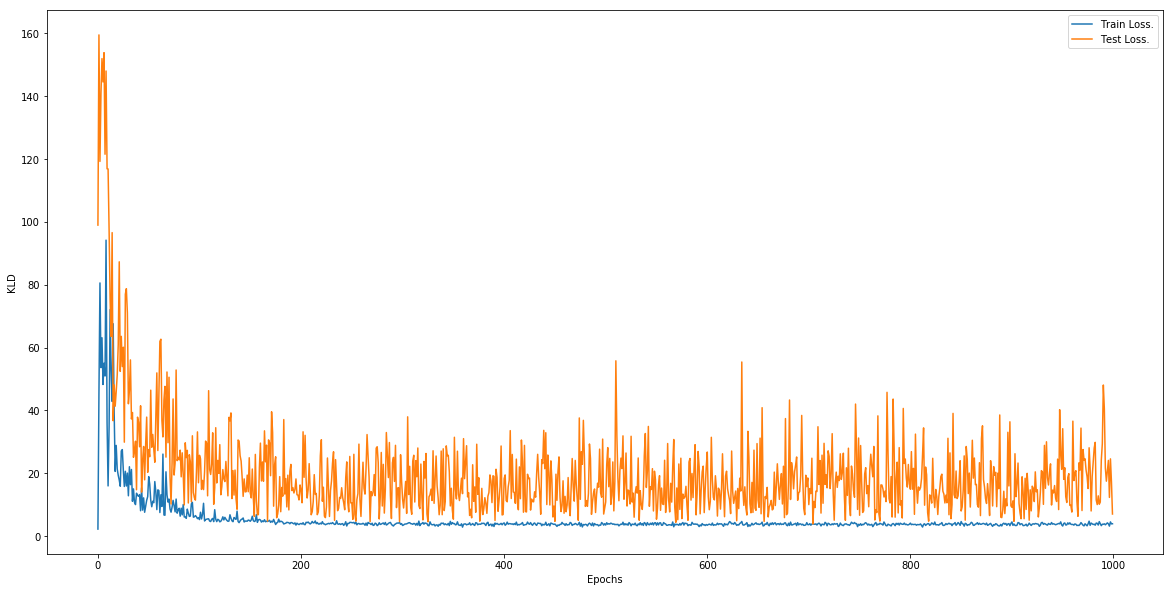

In [22]:
try:
    import matplotlib.pyplot as plt
    %matplotlib inline
    # layer_number corresponds to the index of approximaion_list. 
    # And reconstruct_error_arr is the np.ndarray of reconstruction error rates.
    fig = plt.figure(figsize=(20, 10))
    plt.plot(RCN.loss_arr[:, 0], label="Train Loss.")
    plt.plot(RCN.loss_arr[:, 1], label="Test Loss.")
    plt.xlabel("Epochs")
    plt.ylabel("KLD")
    plt.legend()
    plt.show();plt.close()
except:
    pass

(100,)
(100,)


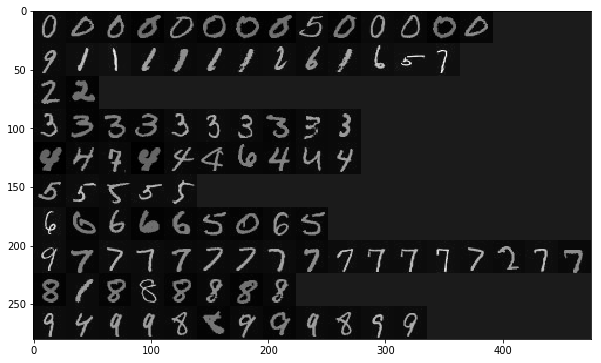

In [25]:
all_label_arr = None
all_key_arr = None
for k in range(5):
    key_arr = np.arange(observed_arr.shape[0])
    np.random.shuffle(key_arr)
    label_arr = RCN.inference(observed_arr=observed_arr[key_arr][:batch_size]).argmax(axis=1)
    
    if all_label_arr is None:
        all_label_arr = label_arr
    else:
        all_label_arr = np.r_[all_label_arr, label_arr]

    if all_key_arr is None:
        all_key_arr = key_arr[:batch_size]
    else:
        all_key_arr = np.r_[all_key_arr, key_arr[:batch_size]]

print(all_key_arr.shape)
print(all_label_arr.shape)

max_n = 0
for i in range(10):
    k = observed_arr[all_key_arr][all_label_arr == i].shape[0]

    if k > max_n:
        max_n = k


from PIL import Image

total_arr = np.zeros((height * 10, width * max_n))

for i in range(10):
    k = 0
    for arr in observed_arr[all_key_arr][all_label_arr == i]:
        arr = arr.reshape((height, width))
        total_arr[height * i:height * (i+1), width * k:width * (k+1)] = arr
        k = k + 1

plt.figure(figsize=(10, 10))
plt.imshow(total_arr, cmap="gray")
plt.show()

(100,)
(100,)


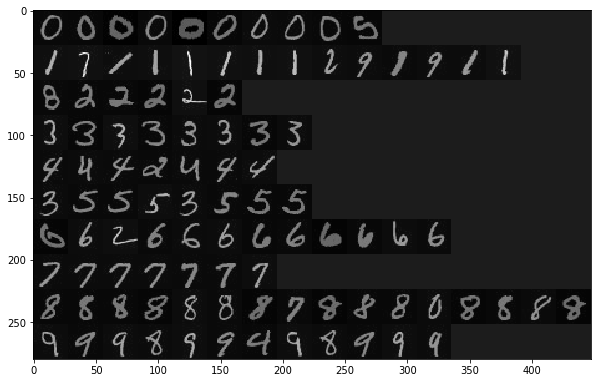

In [29]:
f_arr = RCN.inference(observed_arr=observed_arr[:batch_size])
all_label_arr = None
all_key_arr = None
for k in range(5):
    key_arr = np.arange(observed_arr.shape[0])
    np.random.shuffle(key_arr)
    label_arr = RCN.inference(observed_arr=observed_arr[key_arr][:batch_size]).argmax(axis=1)
    
    if all_label_arr is None:
        all_label_arr = label_arr
    else:
        all_label_arr = np.r_[all_label_arr, label_arr]

    if all_key_arr is None:
        all_key_arr = key_arr[:batch_size]
    else:
        all_key_arr = np.r_[all_key_arr, key_arr[:batch_size]]

print(all_key_arr.shape)
print(all_label_arr.shape)

max_n = 0
for i in range(10):
    k = observed_arr[all_key_arr][all_label_arr == i].shape[0]

    if k > max_n:
        max_n = k


from PIL import Image

total_arr = np.zeros((height * 10, width * max_n))

for i in range(10):
    k = 0
    for arr in observed_arr[all_key_arr][all_label_arr == i]:
        arr = arr.reshape((height, width))
        total_arr[height * i:height * (i+1), width * k:width * (k+1)] = arr
        k = k + 1

plt.figure(figsize=(10, 10))
plt.imshow(total_arr, cmap="gray")
plt.show()

In [31]:
feature_generator2 = LabelImageGenerator(
    epochs=1000,
    batch_size=500,
    training_image_dir="../../../../Downloads/trainingSample/trainingSample///",
    test_image_dir="../../../../Downloads/trainingSample/trainingSample///",
    seq_len=None,
    gray_scale_flag=True,
    wh_size_tuple=(width, height),
    norm_mode="z_score"
)

In [32]:
for data, _data, _, _ in feature_generator2.generate():
    observed_arr2 = data
    label_arr2 = _data
    break

(100,)
(100,)


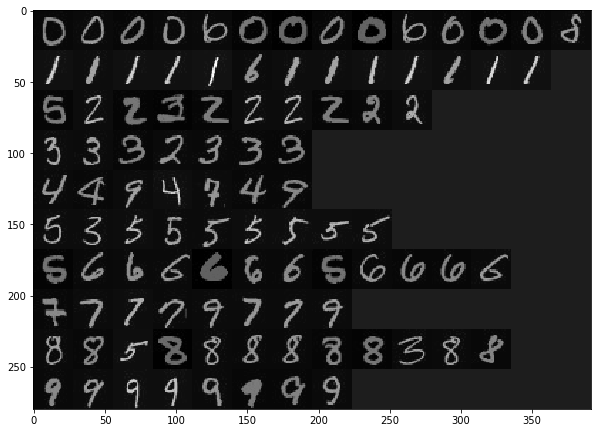

In [33]:
f_arr2 = RCN.inference(observed_arr=observed_arr2[:batch_size])
all_label_arr = None
all_key_arr = None
for k in range(5):
    key_arr = np.arange(observed_arr2.shape[0])
    np.random.shuffle(key_arr)
    label_arr = RCN.inference(observed_arr=observed_arr2[key_arr][:batch_size]).argmax(axis=1)
    
    if all_label_arr is None:
        all_label_arr = label_arr
    else:
        all_label_arr = np.r_[all_label_arr, label_arr]

    if all_key_arr is None:
        all_key_arr = key_arr[:batch_size]
    else:
        all_key_arr = np.r_[all_key_arr, key_arr[:batch_size]]

print(all_key_arr.shape)
print(all_label_arr.shape)

max_n = 0
for i in range(10):
    k = observed_arr2[all_key_arr][all_label_arr == i].shape[0]

    if k > max_n:
        max_n = k


from PIL import Image

total_arr = np.zeros((height * 10, width * max_n))

for i in range(10):
    k = 0
    for arr in observed_arr2[all_key_arr][all_label_arr == i]:
        arr = arr.reshape((height, width))
        total_arr[height * i:height * (i+1), width * k:width * (k+1)] = arr
        k = k + 1

plt.figure(figsize=(10, 10))
plt.imshow(total_arr, cmap="gray")
plt.show()